In [ ]:
import pandas as pd

In [ ]:
raw_data=pd.read_csv("/content/drive/MyDrive/JTP/Copy of data-final.csv",delimiter="\t").dropna()[:5000]

In [ ]:
def calc_from_rawData(answers):
  d = [
      sum(answers[40:50]), #"Open"
      sum(answers[30:40]), #"Consc"
      sum(answers[:10]),  #"Extrav"
      sum(answers[20:30]), #"Agree"
      sum(answers[10:20]), #"Neuro"
  ]
  return d

data=[]
for index,row in raw_data.iterrows():
  data.append(calc_from_rawData(row.values))
data

[[33.0, 32.0, 30.0, 31.0, 24.0],
 [27.0, 31.0, 34.0, 32.0, 21.0],
 [31.0, 28.0, 29.0, 28.0, 26.0],
 [31.0, 27.0, 26.0, 32.0, 27.0],
 [36.0, 32.0, 35.0, 30.0, 23.0],
 [32.0, 29.0, 30.0, 28.0, 22.0],
 [37.0, 29.0, 35.0, 33.0, 30.0],
 [31.0, 33.0, 30.0, 32.0, 20.0],
 [33.0, 25.0, 28.0, 29.0, 28.0],
 [27.0, 29.0, 34.0, 33.0, 31.0],
 [38.0, 32.0, 31.0, 29.0, 35.0],
 [35.0, 44.0, 36.0, 41.0, 38.0],
 [37.0, 28.0, 32.0, 34.0, 26.0],
 [32.0, 33.0, 30.0, 22.0, 36.0],
 [42.0, 33.0, 28.0, 38.0, 36.0],
 [36.0, 35.0, 33.0, 40.0, 35.0],
 [34.0, 26.0, 28.0, 32.0, 35.0],
 [30.0, 31.0, 29.0, 35.0, 26.0],
 [33.0, 25.0, 36.0, 33.0, 27.0],
 [38.0, 37.0, 36.0, 33.0, 36.0],
 [30.0, 31.0, 27.0, 33.0, 34.0],
 [27.0, 25.0, 31.0, 30.0, 36.0],
 [27.0, 26.0, 31.0, 31.0, 26.0],
 [42.0, 37.0, 30.0, 30.0, 24.0],
 [34.0, 29.0, 29.0, 28.0, 36.0],
 [37.0, 31.0, 39.0, 39.0, 36.0],
 [30.0, 26.0, 35.0, 34.0, 26.0],
 [37.0, 30.0, 27.0, 29.0, 25.0],
 [31.0, 34.0, 27.0, 30.0, 35.0],
 [34.0, 30.0, 30.0, 29.0, 41.0],
 [39.0, 30

In [ ]:
df=pd.DataFrame(data,columns=["O","C","E","A","N"])

In [ ]:
df.describe()

,O,C,E,A,N
count,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06
mean,3.265894e+01,3.123406e+01,3.023461e+01,3.155419e+01,3.024087e+01
std,4.296409e+00,4.284790e+00,3.861503e+00,4.023148e+00,6.733773e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+01,2.900000e+01,2.800000e+01,2.900000e+01,2.600000e+01
50%,3.300000e+01,3.100000e+01,3.000000e+01,3.200000e+01,3.000000e+01
75%,3.500000e+01,3.400000e+01,3.200000e+01,3.400000e+01,3.500000e+01
max,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01


In [ ]:
df.to_json('data.json', orient='records')

In [ ]:
enc_df=df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

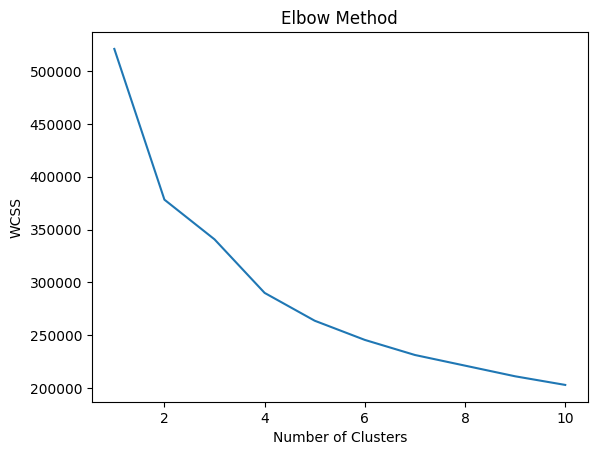

[520978.12839999935, 378294.5381504274, 340728.710655578, 290046.0538518111, 263702.23569454136, 245550.47242937196, 231278.2884426385, 221199.94142556415, 211113.99097153387, 202945.35391248832]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array(df)

wcss = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values for different k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
print(wcss)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
from scipy.spatial.distance import cosine
import numpy as np
vectors=data
query_vector=[45.0, 34.0, 37.0, 37.0, 26.0]
cluster_label = kmeans.predict([query_vector])[0]

# Get indices of vectors belonging to the predicted cluster
cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]

# Calculate similarity between query vector and vectors in the cluster
distances = [np.linalg.norm(np.array(query_vector) - np.array(vectors[i])) for i in cluster_indices]


# Get index of vector with highest similarity
most_similar_index = cluster_indices[np.argmin(distances)]

print("Index of most similar vector:", most_similar_index)
data[most_similar_index]

Index of most similar vector: 3782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


[41.0, 33.0, 33.0, 37.0, 29.0]

In [ ]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
loaded_model = joblib.load('kmeans_model.pkl')